### Notebook para realizar exploraciones rapidas de imagenes GeoTIFF

Las imagenes tif poseen bandas las cuales estan georeferenciadas con una latitud y longitud, cada elemento de estas bandas corresponden al dato de un PIXEL de la imagen. La densidad de datos de la imagen esta dada en la resolucion de la imagen ej: Imagenes de satelite Sentinel 10mx10m

In [3]:
import rasterio
from rasterio import plot
import pandas as pd
import numpy as np

Plot image raster

In [25]:
#PARAMS
path_image_raster = "./v4/NASA_USDA_SMAP_SM20190502_20190504.ssm.tif"

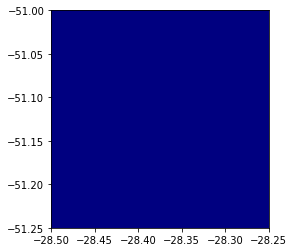

<AxesSubplot:>

In [26]:
ph = rasterio.open(path_image_raster, driver="GTiff")
plot.show(ph, cmap='gist_ncar')

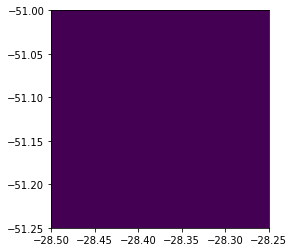

<AxesSubplot:>

In [27]:
plot.show(ph)

In [28]:
#mirar la primer banda
ph.read()

array([[[-999.]]], dtype=float32)

In [23]:
#mirar la ultima banda
ph.read()[0].reshape(-1)

array([-999.], dtype=float32)

In [ ]:
#cuantas bandas posee?
len(ph.read()[0])

Function transform raster data (image GeoTIFF) to vector data (Geodataframe)

*** ESTA IMAGEN TIENE DEMASIADAS BANDAS, EN LA LINEA 13 SE TOMA SOLO UNA BANDA

In [2]:
#Function convert raster image to  vector data
def raster_to_geodataframe(image_path, name_bands=None):
    # Making dataframe with rows and columns indexes of the raster
    data = pd.DataFrame()
    row_idxs, col_idxs, lon, lat = get_lonlat(image_path)
    data['row_idxs'] = row_idxs
    data['col_idxs'] = col_idxs
    # Add latitude and longitude columns into dataframe
    data['longitude'], data['latitude'] = lon, lat

    # Add bands column into dataframe
    raster_image = rasterio.open(image_path).read()
    for idx, band in enumerate(raster_image[0][:1]):
        if(name_bands):
            name_band = name_bands[idx]
        else:
            name_band = f'band_{idx}'
            
    data[name_band] = band
    
    return gpd.GeoDataFrame(data)
    
def get_lonlat(image_path):
# From long/lat to east/north with Rasterio
  with rasterio.open(image_path) as src:
  # From row/col to long/lat and east/north with Rasterio
      row, col = get_row_col_idxs(image_path)     
      lon, lat  = src.xy(row, col) # image --> spatial coordinates
      return row, col, lon, lat
def get_row_col_idxs(image_path):
    raster_image = get_raster_image(image_path)
    # Matrix --> Rows and columns Index (Shape: MxN)
    col_idxs, row_idxs = np.meshgrid(np.arange(raster_image.shape[2]), np.arange(raster_image.shape[1]))
    # Get coordinates of matrix pixels in vector
    col_idxs = col_idxs.reshape(-1)
    row_idxs = row_idxs.reshape(-1)
    return row_idxs, col_idxs
def get_raster_image(image_path):
    # Get raster
    r_image = rasterio.open(image_path)
    # NDVI values of pixels
    raster_image = r_image.read()
    return raster_image

Transform

In [ ]:
gdf_image = raster_to_geodataframe(path_image_raster)

In [ ]:
gdf_image.head()

In [ ]:
#creamos la georeferencia con la latitud y longitud
def create_point_object(row):
    lon = row['longitude']
    lat = row['latitude']
    return Point(lon, lat)

gdf_image['geometry'] = gdf_image.apply(lambda row: create_point_object(row), axis=1)

In [ ]:
gdf_image.plot()

Fin exploracion rapida